## Importing Libraries

Importing some important libraries

- pandas: used for data manipulation and analysis
- numpy: used for numerical operations
- matplotlib: used for plotting
- seaborn: used for data visualization
- sklearn: used for machine learning


In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Loading/Reading Dataset

- Loading the given dataset using pandas


In [90]:
# Load the dataset
file_path = 'C:\\Users\\Himanshu Ugale\\Desktop\\Immverse Task\\immverse_ai_eval_dataset.xlsx'
data = pd.read_excel(file_path)

## Basic Overview

Display basic dataset information (column types, null values) and show the first few rows to understand the structure and contents.
- Finding out null values 
- Finding out missing values
- Finding out unique values
- Finding out data types
- Finding out the summary of the data 


In [91]:
# Display basic information about the dataset
print("Dataset Overview:")
print(data.info())
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        40 non-null     int64 
 1   sentence  40 non-null     object
 2   voice     40 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.1+ KB
None
   id                                       sentence   voice
0   1                    The chef prepares the meal.  Active
1   2       The teacher explains the lesson clearly.  Active
2   3  The gardener waters the plants every morning.  Active
3   4              The kids play soccer in the park.  Active
4   5            The author wrote a thrilling novel.  Active


## Spliting Dataset

Spliting the dataset according to task:
- 60% for training
- 20% for validation
- 20% for testing



In [92]:
# Split the dataset into train (60%), validation (20%), and test (20%)
train_data, temp_data = train_test_split(data, test_size=0.4, stratify=data['voice'], random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['voice'], random_state=42)

Checking whether the dataset is split properly or not

In [93]:
print(f"Training Set Size: {len(train_data)}")
print(f"Validation Set Size: {len(val_data)}")
print(f"Test Set Size: {len(test_data)}")

Training Set Size: 24
Validation Set Size: 8
Test Set Size: 8


## Text vectorization using TF-IDF

In [94]:
# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['sentence'])
X_val = vectorizer.transform(val_data['sentence'])
X_test = vectorizer.transform(test_data['sentence'])

## Labeling 

Extract target labels (voice) for training, validation, and testing.

In [95]:
# Encode labels
y_train = train_data['voice']
y_val = val_data['voice']
y_test = test_data['voice']


## Use of Classification Models

Used Classifier Models for training models:
- Random Forest
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Decision Tree

In [96]:
# Classification models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}


## Making of list to store the results

Making of list to store the results & Model comparision 

In [97]:
# Initialize a list to store the results
results = []

best_model = None
best_accuracy = 0

## Training & Testing of Models

Training:
- The model is trained on the training dataset (X_train and y_train).

Validation Predictions:
- The model predicts labels for the validation dataset (X_val).
- Calculate performance summary (accuracy, precision, recall, F1-score) for validation predictions.

Testing:
- The model predicts labels for the test dataset (X_test).
- Calculate performance summary (accuracy, precision, recall, F1-score) for test predictions.

Confusion Matrix Visualization:
- Plot a confusion matrix for the test predictions.

Training Random Forest...
Validation Performance for Random Forest:
              precision    recall  f1-score   support

      Active       1.00      1.00      1.00         4
     Passive       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Test Performance for Random Forest:
              precision    recall  f1-score   support

      Active       1.00      1.00      1.00         4
     Passive       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Accuracy: 1.00


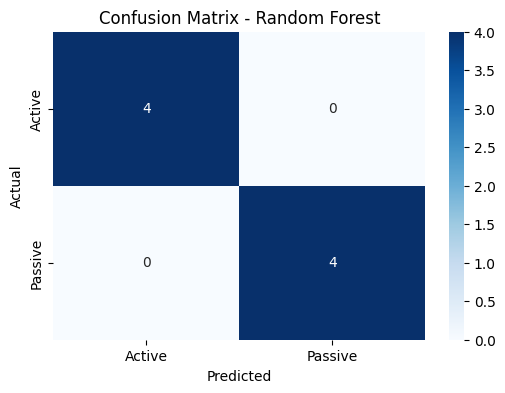

Training Logistic Regression...
Validation Performance for Logistic Regression:
              precision    recall  f1-score   support

      Active       0.00      0.00      0.00         4
     Passive       0.43      0.75      0.55         4

    accuracy                           0.38         8
   macro avg       0.21      0.38      0.27         8
weighted avg       0.21      0.38      0.27         8

Test Performance for Logistic Regression:
              precision    recall  f1-score   support

      Active       0.50      0.25      0.33         4
     Passive       0.50      0.75      0.60         4

    accuracy                           0.50         8
   macro avg       0.50      0.50      0.47         8
weighted avg       0.50      0.50      0.47         8

Accuracy: 0.50


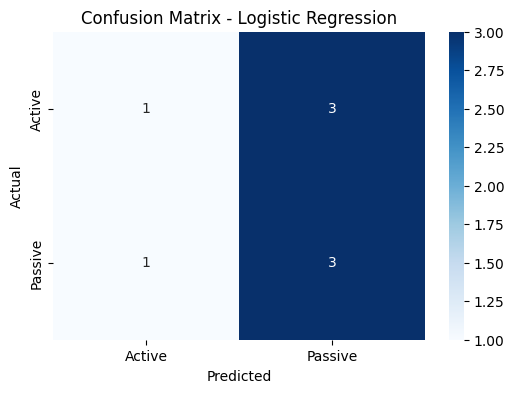

Training K-Nearest Neighbors...
Validation Performance for K-Nearest Neighbors:
              precision    recall  f1-score   support

      Active       1.00      1.00      1.00         4
     Passive       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Test Performance for K-Nearest Neighbors:
              precision    recall  f1-score   support

      Active       1.00      1.00      1.00         4
     Passive       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Accuracy: 1.00


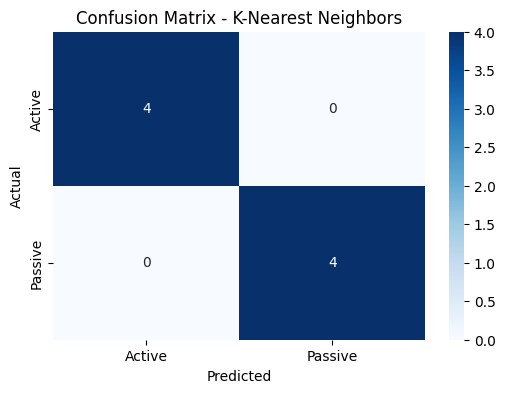

Training Support Vector Machine...
Validation Performance for Support Vector Machine:
              precision    recall  f1-score   support

      Active       0.00      0.00      0.00         4
     Passive       0.20      0.25      0.22         4

    accuracy                           0.12         8
   macro avg       0.10      0.12      0.11         8
weighted avg       0.10      0.12      0.11         8

Test Performance for Support Vector Machine:
              precision    recall  f1-score   support

      Active       0.20      0.25      0.22         4
     Passive       0.00      0.00      0.00         4

    accuracy                           0.12         8
   macro avg       0.10      0.12      0.11         8
weighted avg       0.10      0.12      0.11         8

Accuracy: 0.12


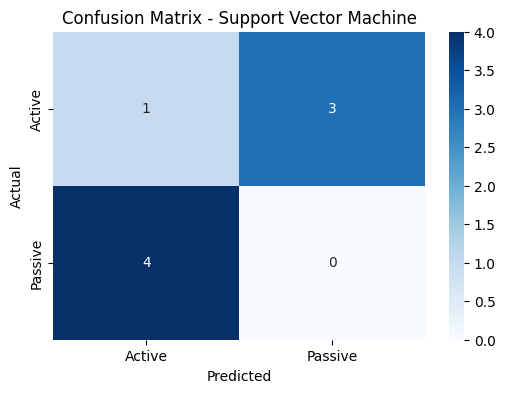

Training Decision Tree...
Validation Performance for Decision Tree:
              precision    recall  f1-score   support

      Active       1.00      1.00      1.00         4
     Passive       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Test Performance for Decision Tree:
              precision    recall  f1-score   support

      Active       1.00      1.00      1.00         4
     Passive       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Accuracy: 1.00


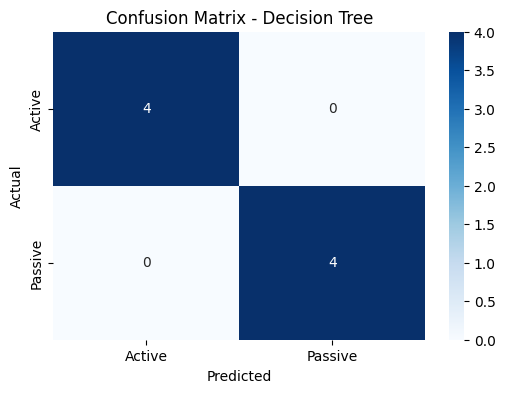

Best Model: RandomForestClassifier with accuracy of 1.00


In [98]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    val_preds = model.predict(X_val)
    print(f"Validation Performance for {model_name}:")
    print(classification_report(y_val, val_preds))

    # Evaluate on test set
    test_preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, test_preds)
    precision = precision_score(y_test, test_preds, average='weighted')
    recall = recall_score(y_test, test_preds, average='weighted')
    f1 = f1_score(y_test, test_preds, average='weighted')
    
    # Save the results for the table
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    
    print(f"Test Performance for {model_name}:")
    print(classification_report(y_test, test_preds))
    print(f"Accuracy: {accuracy:.2f}")
    
    # Track the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test, test_preds)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

print(f"Best Model: {type(best_model).__name__} with accuracy of {best_accuracy:.2f}")



## Analyse the Model based on metrics

The model is trained on the dataset and the metrics are calculated. The metrics are used to evaluate the performance of the model.

So, according to the metrics I found that 3 models gives the same performance which are:
- Random Forest
- Support Vector Machine (SVM)
- Decision Tree

But I choose best model for this classification is: Random Forest

- Better generalization than a single Decision Tree due to its ensemble nature, reducing overfitting.
- Higher accuracy and robustness, handling noisy data well.
- Feature importance insights for better interpretability.
- Scalability and efficiency with large datasets, and it handles both categorical and continuous data well.
- Requires less tuning and works effectively without needing feature scaling.
- It's a solid, versatile choice when compared to Decision Trees and SVM.





  

In [99]:
# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print("Model Comparison Results:")
print(results_df)

Model Comparison Results:
                    Model  Accuracy  Precision  Recall  F1 Score
0           Random Forest     1.000        1.0   1.000  1.000000
1     Logistic Regression     0.500        0.5   0.500  0.466667
2     K-Nearest Neighbors     1.000        1.0   1.000  1.000000
3  Support Vector Machine     0.125        0.1   0.125  0.111111
4           Decision Tree     1.000        1.0   1.000  1.000000


## Prediction of voice over sentences

The following is an example of how to use the model to predict the voice over sentences:

Enter any of the sentences in the input:

(Examples)

1. * Active voice: "I am cooking a meal"
   * Passive voice: "A meal is being cooked by me"

2. * Active voice: "He writes an essay"
   * Passive voice: "An essay is written by him"

3. * Active voice: "Carmen sings the song"
   * Passive voice: "The song is sung by Carmen"



In [100]:
# Function to predict voice of a new sentence using the best model
def predict_voice():
    sentence = input("Enter a sentence to classify (active or passive voice): ")
    sentence_vectorized = vectorizer.transform([sentence])
    prediction = best_model.predict(sentence_vectorized)[0]
    print(f"The sentence \"{sentence}\" is classified as: {prediction}")

# Example usage
predict_voice()

The sentence "The song is sung by Carmen." is classified as: Passive
